In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df_restaurante_review = pd.read_csv('data/Yelp/df_restaurante_review.csv')

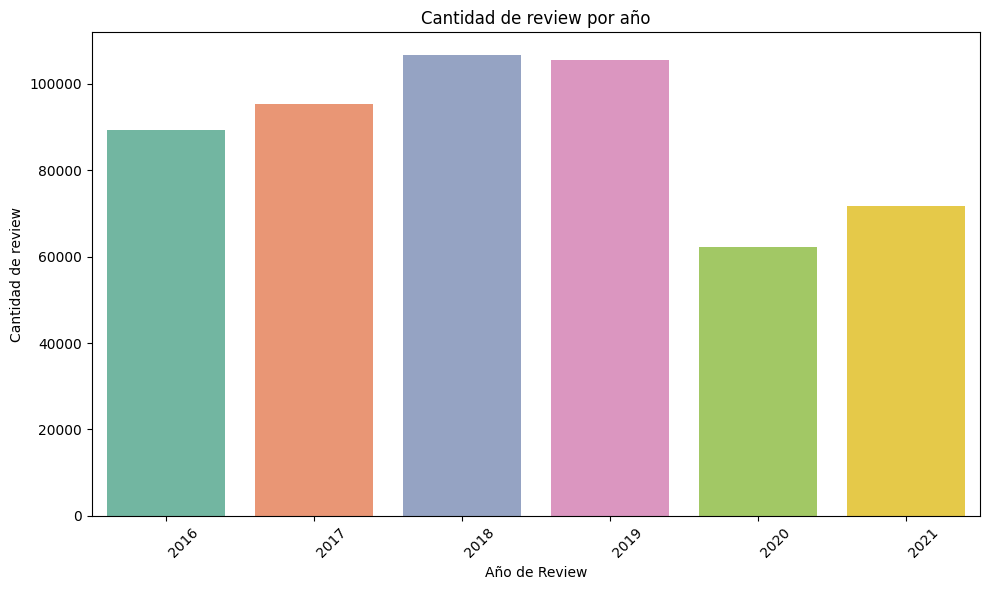

In [4]:
#Grafico que muestra la cantidad de review por año


#Se toma una muestra de los años 2016 a 2021
df_restaurante_review_16_21 = df_restaurante_review[(df_restaurante_review['year']>= 2016) & (df_restaurante_review ['year']<=2021)  ]


# Calcula la cantidad de revisiones por año
count_year = df_restaurante_review_16_21['year'].value_counts()
count_year = count_year.sort_index()

# Configura la paleta de colores
colores = sns.color_palette("Set2", len(count_year))


#Configura etiqueta y titulo
plt.figure(figsize=(10,6))
sns.barplot(x=count_year.index, y=count_year.values, hue=count_year.index, palette=colores,dodge=False, legend=False )
plt.xlabel('Año de Review'); plt.ylabel('Cantidad de review'); plt.title('Cantidad de review por año')
plt.xticks(rotation =45,ha = 'left')
plt.tight_layout()

#Se guarda el grafico en formato png
plt.savefig('review_2016_2021.png')
#muestra el grafico
plt.show()

In [ ]:
df_restaurante_review_16_21 

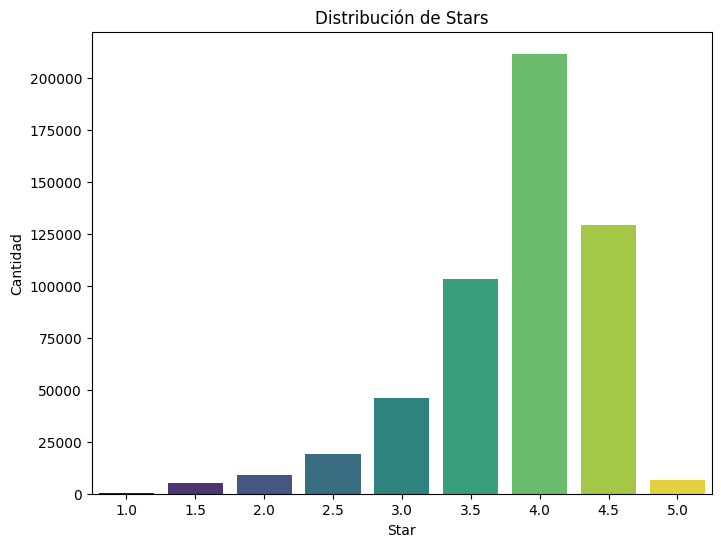

In [8]:

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='stars_x', data=df_restaurante_review_16_21, hue='stars_x', palette='viridis', legend=False)

# Configurar etiquetas y título
plt.xlabel('Star')
plt.ylabel('Cantidad')
plt.title('Distribución de Stars')

#Se guarda el grafico en formato png
plt.savefig('stars.png')
# Mostrar el gráfico
plt.show()



In [11]:
checkin = pd.read_csv('data/Yelp/checkin.csv')

In [32]:
checkin = checkin[(checkin['year'] >= 2016) & (checkin['year'] <= 2021)]

In [33]:
checkin.sample(5)

,business_id,year,month,day,hora,fecha_reserva
7431019,XvjJflV_0I1CS0_dckuV-A,2016,9,15,0,2016-09-15
12812865,xF0Eg2L1hTxJsM_xM1KPWg,2019,9,9,0,2019-09-09
3755648,G9LZoNlCfRH941q87_JLIg,2018,6,22,0,2018-06-22
8532590,cN2w2eM2BUQ_uJ1CaRKcAQ,2016,2,17,0,2016-02-17
9650725,hdh1tm7ZyCHc4S-2nST61A,2016,5,25,0,2016-05-25


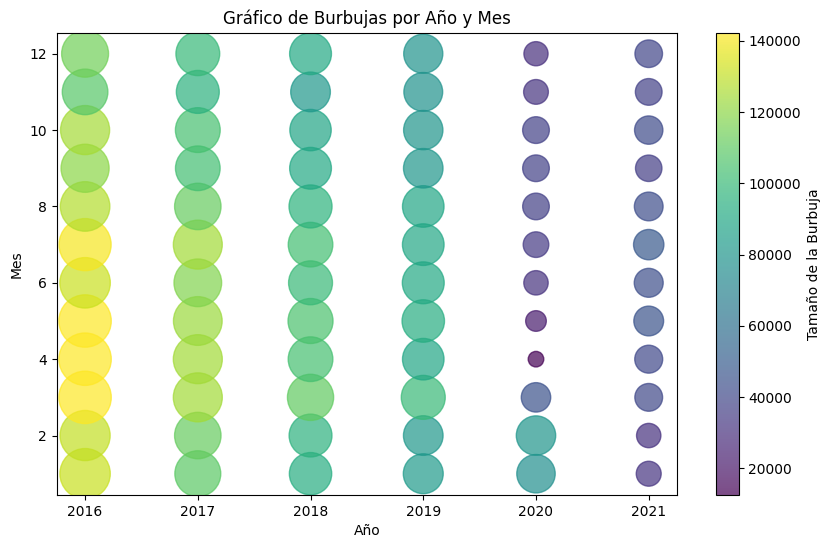

In [39]:
# Se agrupan los datos necesarios y se calcula el tamaño de las burbujas
df_agrupado = checkin.groupby(['year', 'month'], as_index=False).size()

# Se crea el gráfico de burbujas
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_agrupado['year'],
    df_agrupado['month'],
    s=df_agrupado['size'] * 0.01,  # Ajusta el tamaño de la burbuja según la cantidad de datos
    c=df_agrupado['size'],  # Utiliza 'size' como valor para el mapeo de colores
    alpha=0.7,  # Transparencia de las burbujas
    cmap='viridis'  # Colormap
)

# Personaliza el gráfico
plt.title('Gráfico de Burbujas por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.colorbar(scatter, label='Tamaño de la Burbuja')

# Muestra el gráfico
plt.savefig('checkin.png')
plt.show()
